<a href="https://colab.research.google.com/github/cwcheng0/Tourism/blob/master/2017_2018_TaiwanTourismMonthlyRevenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 台灣旅遊業每月營收圖_**201812**

上市公司

In [0]:
# Read Taiwan Tourism Public Company Revenues from Public Data
# Load libraries
import pandas as pd
import requests
from io import StringIO
import datetime
import time

def monthly_report(year, month):
    
    # 假如是西元，轉成民國
    if year > 1990:
        year -= 1911
    
    url = 'http://mops.twse.com.tw/nas/t21/sii/t21sc03_'+str(year)+'_'+str(month)+'_0.html'
    if year <= 98:
        url = 'http://mops.twse.com.tw/nas/t21/sii/t21sc03_'+str(year)+'_'+str(month)+'.html'
    
    # sudo browser
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    
    # Load current data and use pandas to dataframe
    r = requests.get(url, headers=headers)
    r.encoding = 'big5'
    html_df = pd.read_html(StringIO(r.text))
    
    # 處理一下資料
    if html_df[0].shape[0] > 500:
        df = html_df[0].copy()
    else:
        df = pd.concat([df for df in html_df if df.shape[1] <= 11])
        
    df = df[list(range(0,10))]
    column_index = df.index[(df[0] == '公司代號')][0]
    df.columns = df.iloc[column_index]
    df['當月營收'] = pd.to_numeric(df['當月營收'], 'coerce')
    df = df[~df['當月營收'].isnull()]
    df = df[df['公司代號'] != '合計']
    
    # times
    time.sleep(5)

    return df

In [78]:
# Define some data; get public 2018 December revenues
now = datetime.datetime.now()

# Mark these because new year becomes incorrect
#year = now.year - 1911
#month = now.month

# Get current data
# data = monthly_report(year, month)
data_201812 = monthly_report(107, 12)
data_201812.head()

4,公司代號,公司名稱,當月營收,上月營收,去年當月營收,上月比較增減(%),去年同月增減(%),當月累計營收,去年累計營收,前期比較增減(%)
5,1101,台泥,11404254.0,11784150,10986420,-3.22,3.80,124599062,98311776,26.73
6,1102,亞泥,7738881.0,7626297,7070625,1.47,9.45,83938504,64899182,29.33
7,1103,嘉泥,234983.0,183786,181112,27.85,29.74,2092377,2095606,-0.15
8,1104,環球水泥,465496.0,421815,399796,10.35,16.43,4780994,4405376,8.52
9,1108,幸福水泥,300034.0,269955,322754,11.14,-7.03,3330654,3434454,-3.02


In [79]:
# We only need December data in tourism
# Delete some columns
data_201812.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
data_201812.drop(data_201812.index[:736], inplace=True)

# Drop last rows
data_201812.drop(data_201812.tail(104).index,inplace=True)

# Reset index
data_201812 = data_201812.reset_index(drop=True)

# Replace Column names
data_201812.columns = data_201812.columns.str.replace('公司代號','代號')
data_201812.columns = data_201812.columns.str.replace('公司名稱','名稱')
data_201812.columns = data_201812.columns.str.replace('當月營收','12月營收')

# Check data
data_201812

4,代號,名稱,12月營收
0,2701,萬企,35190.0
1,2702,華園,91410.0
2,2704,國賓,293579.0
3,2705,六福,290844.0
4,2706,第一店,29629.0
5,2707,晶華酒店,654147.0
6,2712,遠雄來,32472.0
7,2722,夏都,57648.0
8,2727,王品,1466357.0
9,2731,雄獅旅遊,1949825.0


In [80]:
# Get 2018 November data
now = datetime.datetime.now()

# Mark these because new year data is incorrect
#year = now.year - 1911 -1
#month = now.month - 2

# Get current data
# data = monthly_report(year, month)
data = monthly_report(107, 11)

# Delete some columns
data.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
data.drop(data.index[:733], inplace=True)

# Drop last rows
data.drop(data.tail(104).index,inplace=True)

# Reset index
data_201811 = data.reset_index(drop=True)

# Replace Column names
data_201811.columns = data_201811.columns.str.replace('公司代號','代號')
data_201811.columns = data_201811.columns.str.replace('公司名稱','名稱')
data_201811.columns = data_201811.columns.str.replace('當月營收','11月營收')

# Check data
data_201811

4,代號,名稱,11月營收
0,5607,遠雄港,146906.0
1,5608,四維航業,345418.0
2,8367,建新國際,147082.0
3,2701,萬企,26711.0
4,2702,華園,82037.0
5,2704,國賓,245348.0
6,2705,六福,272544.0
7,2706,第一店,28834.0
8,2707,晶華酒店,520051.0
9,2712,遠雄來,19923.0


In [81]:
# Get 2018 October data
now = datetime.datetime.now()

# Mark these because new year data is incorrect
#year = now.year - 1911 -1
#month = now.month - 2

# Get current data
# data = monthly_report(year, month)
data = monthly_report(107, 10)
data.head()

# Delete some columns
data.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
data.drop(data.index[:733], inplace=True)

# Drop last rows
data.drop(data.tail(104).index,inplace=True)

# Reset index
data_201810 = data.reset_index(drop=True)

# Replace Column names
data_201810.columns = data_201810.columns.str.replace('公司代號','代號')
data_201810.columns = data_201810.columns.str.replace('公司名稱','名稱')
data_201810.columns = data_201810.columns.str.replace('當月營收','10月營收')

# Check data
data_201810

4,代號,名稱,10月營收
0,5607,遠雄港,153468.0
1,5608,四維航業,354837.0
2,8367,建新國際,126669.0
3,2701,萬企,28611.0
4,2702,華園,106702.0
5,2704,國賓,244878.0
6,2705,六福,287894.0
7,2706,第一店,27800.0
8,2707,晶華酒店,521462.0
9,2712,遠雄來,31227.0


In [82]:
# Get 2018 September data
now = datetime.datetime.now()

# Mark these because new year data is incorrect
#year = now.year - 1911 -1
#month = now.month - 2

# Get current data
# data = monthly_report(year, month)
data = monthly_report(107, 9)

# Delete some columns
data.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
data.drop(data.index[:729], inplace=True)

# Drop last rows
data.drop(data.tail(101).index,inplace=True)

# Reset index
data_201809 = data.reset_index(drop=True)

# Replace Column names
data_201809.columns = data_201809.columns.str.replace('公司代號','代號')
data_201809.columns = data_201809.columns.str.replace('公司名稱','名稱')
data_201809.columns = data_201809.columns.str.replace('當月營收','9月營收')

# Check data
data_201809

4,代號,名稱,9月營收
0,2633,台灣高鐵,3751809.0
1,2634,漢翔公司,2497755.0
2,2636,台驊投控,1073438.0
3,2642,宅配通,291767.0
4,5607,遠雄港,144581.0
5,5608,四維航業,326352.0
6,8367,建新國際,142801.0
7,2701,萬企,29046.0
8,2702,華園,95695.0
9,2704,國賓,260093.0


In [83]:
# Get 2018 August data
now = datetime.datetime.now()

# Mark these because new year data is incorrect
#year = now.year - 1911 -1
#month = now.month - 2

# Get current data
# data = monthly_report(year, month)
data = monthly_report(107, 8)

# Delete some columns
data.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
data.drop(data.index[:725], inplace=True)

# Drop last rows
data.drop(data.tail(99).index,inplace=True)

# Reset index
data_201808 = data.reset_index(drop=True)

# Replace Column names
data_201808.columns = data_201808.columns.str.replace('公司代號','代號')
data_201808.columns = data_201808.columns.str.replace('公司名稱','名稱')
data_201808.columns = data_201808.columns.str.replace('當月營收','8月營收')

# Check data
data_201808

4,代號,名稱,8月營收
0,2617,台航,293239.0
1,2618,長榮航空,16325269.0
2,2630,亞洲航空,257756.0
3,2633,台灣高鐵,3809773.0
4,2634,漢翔公司,2377285.0
5,2636,台驊投控,1030457.0
6,2642,宅配通,269907.0
7,5607,遠雄港,141050.0
8,5608,四維航業,334636.0
9,8367,建新國際,130812.0


In [0]:
# Delete unnecessary columns in some tables
data_201810.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')
data_201809.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')
data_201808.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')

In [85]:
# Merge tables
result = pd.concat([data_201811, data_201810, data_201809, data_201808], axis=1)

result

4,代號,名稱,11月營收,10月營收,9月營收,8月營收
0,5607,遠雄港,146906.0,153468.0,3751809.0,293239.0
1,5608,四維航業,345418.0,354837.0,2497755.0,16325269.0
2,8367,建新國際,147082.0,126669.0,1073438.0,257756.0
3,2701,萬企,26711.0,28611.0,291767.0,3809773.0
4,2702,華園,82037.0,106702.0,144581.0,2377285.0
5,2704,國賓,245348.0,244878.0,326352.0,1030457.0
6,2705,六福,272544.0,287894.0,142801.0,269907.0
7,2706,第一店,28834.0,27800.0,29046.0,141050.0
8,2707,晶華酒店,520051.0,521462.0,95695.0,334636.0
9,2712,遠雄來,19923.0,31227.0,260093.0,130812.0


In [86]:
# Manually reset everything
# Build data frame

Revenue1 = { 
     'Co' : ["12月營收","11月營收", "10月營收", "9月營收", "8月營收", "7月營收", "6月營收", "5月營收", "4月營收", "3月營收", "2月營收", "1月營收"],
     '雄獅': [1949825,2170160,2415137,2609785,2543533,2795532,2780296,2565217,3044496,2646038,2479123,1622966],
     '鳳凰': [162553,170373,320940,309342,302516,309039,332369,261391,268379,140844,275699,70348]}

df = pd.DataFrame(Revenue1)

df

,Co,雄獅,鳳凰
0,12月營收,1949825,162553
1,11月營收,2170160,170373
2,10月營收,2415137,320940
3,9月營收,2609785,309342
4,8月營收,2543533,302516
5,7月營收,2795532,309039
6,6月營收,2780296,332369
7,5月營收,2565217,261391
8,4月營收,3044496,268379
9,3月營收,2646038,140844


# 2018年旅行業上市公司營收變化

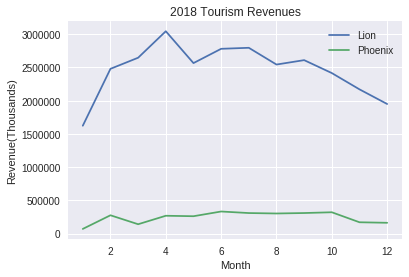

In [87]:
# 2018 Taiwan Stock public revenue comparision
# Draw a plot
import matplotlib.pyplot as plt

month = [12,11,10,9,8,7,6,5,4,3,2,1]

#雄獅
Lion = [1949825,2170160,2415137,2609785,2543533,2795532,2780296,2565217,3044496,2646038,2479123,1622966]

#鳳凰
Phoenix = [162553,170373,320940,309342,302516,309039,332369,261391,268379,140844,275699,70348]

plt.plot(month, Lion, label="Lion")
plt.plot(month, Phoenix, label="Phoenix")
plt.xlabel('Month')
plt.ylabel('Revenue(Thousands)')
plt.title('2018 Tourism Revenues')
plt.legend()


#2017年旅行業上市公司營收變化

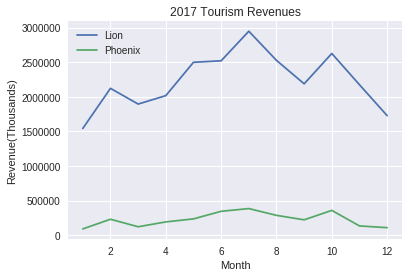

In [88]:
# 2017 Tourism OTC revenues change
# Set 2017 month
month_2017 = [1,2,3,4,5,6,7,8,9,10,11,12]

#雄獅 revenues
Lion_2017 = [1542716,2122372,1895167,2016707,2498469,2520006,2946950,2526373,2187338,2625700,2174231,1727500]

#鳳凰 revenues
Phoenix_2017 = [91665,231264,122783,192715,236662,346088,385471,287622,223110,359270,134681,109796]

plt.plot(month_2017, Lion_2017, label="Lion")
plt.plot(month_2017, Phoenix_2017, label="Phoenix")
plt.xlabel('Month')
plt.ylabel('Revenue(Thousands)')
plt.title('2017 Tourism Revenues')
plt.legend()

#2017/2018年雄獅旅行社營收變化

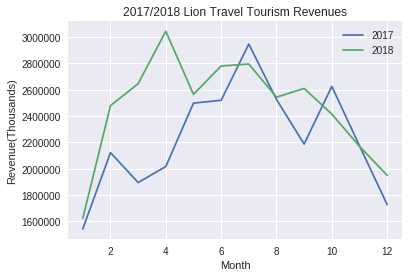

In [89]:
# 2017/2018 Lion Travel Revenues Change
plt.plot(month_2017, Lion_2017, label="2017")
plt.plot(month, Lion, label="2018")
plt.xlabel('Month')
plt.ylabel('Revenue(Thousands)')
plt.title('2017/2018 Lion Travel Tourism Revenues')
plt.legend()

#2017/2018年鳳凰旅行社營收變化

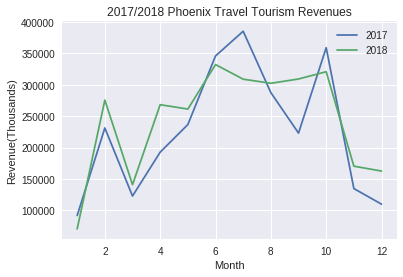

In [90]:
# 2017/2018 Phoenix Travel Revenues Change
plt.plot(month_2017, Phoenix_2017, label="2017")
plt.plot(month, Phoenix, label="2018")
plt.xlabel('Month')
plt.ylabel('Revenue(Thousands)')
plt.title('2017/2018 Phoenix Travel Tourism Revenues')
plt.legend()

#上櫃旅行社營收比較

In [0]:
# Taiwan OTC Tourism Company monthly revenues
# Load libraries
import pandas as pd
import requests
from io import StringIO
import datetime
import time
def monthly_report(year, month):
    
    # 假如是西元，轉成民國
    if year > 1990:
        year -= 1911
    
    url = 'http://mops.twse.com.tw/nas/t21/otc/t21sc03_'+str(year)+'_'+str(month)+'_0.html'
    if year <= 98:
        url = 'http://mops.twse.com.tw/nas/t21/otc/t21sc03_'+str(year)+'_'+str(month)+'.html'
    
    # sudo browser
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    
    # Load current data and use pandas to dataframe
    r = requests.get(url, headers=headers)
    r.encoding = 'big5'
    html_df = pd.read_html(StringIO(r.text))
    
    # 處理一下資料
    if html_df[0].shape[0] > 500:
        df = html_df[0].copy()
    else:
        df = pd.concat([df for df in html_df if df.shape[1] <= 11])
        
    df = df[list(range(0,10))]
    column_index = df.index[(df[0] == '公司代號')][0]
    df.columns = df.iloc[column_index]
    df['當月營收'] = pd.to_numeric(df['當月營收'], 'coerce')
    df = df[~df['當月營收'].isnull()]
    df = df[df['公司代號'] != '合計']
    
    # times
    time.sleep(5)

    return df

In [92]:
## Define some data; get 2018 December data
now = datetime.datetime.now()

# Mark
#year = now.year - 1911
#month = now.month - 1

# Get current data
#dataOTC = monthly_report(year, month)
dataOTC = monthly_report(107, 12)
dataOTC.head()

4,公司代號,公司名稱,當月營收,上月營收,去年當月營收,上月比較增減(%),去年同月增減(%),當月累計營收,去年累計營收,前期比較增減(%)
5,1264,德麥,374937.0,346131,373329,8.32,0.43,3960336,3681486,7.57
6,1796,金穎生技,33619.0,35517,30209,-5.34,11.28,357447,349830,2.17
7,4205,中華食品,126440.0,127221,121898,-0.61,3.72,1491890,1413184,5.56
8,4207,環泰企業,269770.0,296586,283151,-9.04,-4.72,3759841,3361123,11.86
9,4712,南璋,2045.0,4842,23823,-57.76,-91.41,102807,263008,-60.91


In [93]:
# Delete some columns
dataOTC.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
dataOTC.drop(dataOTC.index[:619], inplace=True)

# Drop last rows
dataOTC.drop(dataOTC.tail(95).index,inplace=True)

# Reset index
dataOTC_201812 = dataOTC.reset_index(drop=True)

# Replace Column names
dataOTC_201812.columns = dataOTC_201812.columns.str.replace('公司代號','代號')
dataOTC_201812.columns = dataOTC_201812.columns.str.replace('公司名稱','名稱')
dataOTC_201812.columns = dataOTC_201812.columns.str.replace('當月營收','12月營收')

# Check data
dataOTC_201812

4,代號,名稱,12月營收
0,1259,安心,436189.0
1,1268,漢來美食,339935.0
2,2718,晶悅,24417.0
3,2719,燦星旅,107842.0
4,2729,瓦城泰統,387511.0
5,2732,六角國際,377822.0
6,2734,易飛網,83147.0
7,2736,高野,74465.0
8,2740,天蔥,19124.0
9,2745,五福旅遊,351600.0


In [94]:
# Define some data; get 2018 November data
now = datetime.datetime.now()

# Mark
#year = now.year - 1911
#month = now.month - 2

# Get current data
dataOTC = monthly_report(107, 11)
dataOTC.head()

# Delete some columns
dataOTC.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
dataOTC.drop(dataOTC.index[:619], inplace=True)

# Drop last rows
dataOTC.drop(dataOTC.tail(95).index,inplace=True)

# Reset index
dataOTC_201811 = dataOTC.reset_index(drop=True)

# Replace Column names
dataOTC_201811.columns = dataOTC_201811.columns.str.replace('公司代號','代號')
dataOTC_201811.columns = dataOTC_201811.columns.str.replace('公司名稱','名稱')
dataOTC_201811.columns = dataOTC_201811.columns.str.replace('當月營收','11月營收')

# Check data
dataOTC_201811

4,代號,名稱,11月營收
0,1259,安心,432043.0
1,1268,漢來美食,256629.0
2,2718,晶悅,19997.0
3,2719,燦星旅,114542.0
4,2729,瓦城泰統,318167.0
5,2732,六角國際,322286.0
6,2734,易飛網,61410.0
7,2736,高野,55883.0
8,2740,天蔥,13356.0
9,2745,五福旅遊,449373.0


In [95]:
# Define some data; get 2018 October data
now = datetime.datetime.now()
year = now.year - 1911
month = now.month - 2

# Get current data
dataOTC = monthly_report(107, 10)

# Delete some columns
dataOTC.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
dataOTC.drop(dataOTC.index[:619], inplace=True)

# Drop last rows
dataOTC.drop(dataOTC.tail(95).index,inplace=True)

# Reset index
dataOTC_201810 = dataOTC.reset_index(drop=True)

# Replace Column names
dataOTC_201810.columns = dataOTC_201810.columns.str.replace('公司代號','代號')
dataOTC_201810.columns = dataOTC_201810.columns.str.replace('公司名稱','名稱')
dataOTC_201810.columns = dataOTC_201810.columns.str.replace('當月營收','10月營收')

# Check data
dataOTC_201810

4,代號,名稱,10月營收
0,1259,安心,438450.0
1,1268,漢來美食,264288.0
2,2718,晶悅,20186.0
3,2719,燦星旅,125794.0
4,2729,瓦城泰統,322364.0
5,2732,六角國際,333753.0
6,2734,易飛網,75873.0
7,2736,高野,46157.0
8,2740,天蔥,16828.0
9,2745,五福旅遊,479817.0


In [96]:
# Define some data; get 2018 September data
now = datetime.datetime.now()
year = now.year - 1911
month = now.month - 3

# Get current data
dataOTC = monthly_report(107, 9)

# Delete some columns
dataOTC.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
dataOTC.drop(dataOTC.index[:619], inplace=True)

# Drop last rows
dataOTC.drop(dataOTC.tail(95).index,inplace=True)

# Reset index
dataOTC_201809 = dataOTC.reset_index(drop=True)

# Replace Column names
dataOTC_201809.columns = dataOTC_201809.columns.str.replace('公司代號','代號')
dataOTC_201809.columns = dataOTC_201809.columns.str.replace('公司名稱','名稱')
dataOTC_201809.columns = dataOTC_201809.columns.str.replace('當月營收','9月營收')

# Check data
dataOTC_201809

4,代號,名稱,9月營收
0,1259,安心,453036.0
1,1268,漢來美食,299610.0
2,2718,晶悅,18193.0
3,2719,燦星旅,166387.0
4,2729,瓦城泰統,348747.0
5,2732,六角國際,360728.0
6,2734,易飛網,73636.0
7,2736,高野,37396.0
8,2740,天蔥,19265.0
9,2745,五福旅遊,463601.0


In [97]:
# Define some data; get 2018 August data
now = datetime.datetime.now()
#year = now.year - 1911
#month = now.month - 4

# Get current data
dataOTC = monthly_report(107,8)

# Delete some columns
dataOTC.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
dataOTC.drop(dataOTC.index[:619], inplace=True)

# Drop last rows
dataOTC.drop(dataOTC.tail(95).index,inplace=True)

# Reset index
dataOTC_201808 = dataOTC.reset_index(drop=True)

# Replace Column names
dataOTC_201808.columns = dataOTC_201808.columns.str.replace('公司代號','代號')
dataOTC_201808.columns = dataOTC_201808.columns.str.replace('公司名稱','名稱')
dataOTC_201808.columns = dataOTC_201808.columns.str.replace('當月營收','8月營收')

# Check data
dataOTC_201808

4,代號,名稱,8月營收
0,1259,安心,469268.0
1,1268,漢來美食,299096.0
2,2718,晶悅,19001.0
3,2719,燦星旅,251706.0
4,2729,瓦城泰統,409367.0
5,2732,六角國際,371181.0
6,2734,易飛網,73252.0
7,2736,高野,54207.0
8,2740,天蔥,30768.0
9,2745,五福旅遊,569747.0


In [98]:
# Define some data; get 2018 July data
now = datetime.datetime.now()
#year = now.year - 1911
#month = now.month - 5

# Get current data
dataOTC = monthly_report(107,7)

# Delete some columns
dataOTC.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
dataOTC.drop(dataOTC.index[:619], inplace=True)

# Drop last rows
dataOTC.drop(dataOTC.tail(95).index,inplace=True)

# Reset index
dataOTC_201807 = dataOTC.reset_index(drop=True)

# Replace Column names
dataOTC_201807.columns = dataOTC_201807.columns.str.replace('公司代號','代號')
dataOTC_201807.columns = dataOTC_201807.columns.str.replace('公司名稱','名稱')
dataOTC_201807.columns = dataOTC_201807.columns.str.replace('當月營收','7月營收')

# Check data
dataOTC_201807

4,代號,名稱,7月營收
0,1259,安心,479534.0
1,1268,漢來美食,288047.0
2,2718,晶悅,16479.0
3,2719,燦星旅,284985.0
4,2729,瓦城泰統,388875.0
5,2732,六角國際,367738.0
6,2734,易飛網,79215.0
7,2736,高野,54197.0
8,2740,天蔥,28284.0
9,2745,五福旅遊,678981.0


In [99]:
# Define some data; get 2018 June data
now = datetime.datetime.now()
#year = now.year - 1911
#month = now.month - 6

# Get current data
dataOTC = monthly_report(107,6)

# Delete some columns
dataOTC.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
dataOTC.drop(dataOTC.index[:619], inplace=True)

# Drop last rows
dataOTC.drop(dataOTC.tail(95).index,inplace=True)

# Reset index
dataOTC_201806 = dataOTC.reset_index(drop=True)

# Replace Column names
dataOTC_201806.columns = dataOTC_201806.columns.str.replace('公司代號','代號')
dataOTC_201806.columns = dataOTC_201806.columns.str.replace('公司名稱','名稱')
dataOTC_201806.columns = dataOTC_201806.columns.str.replace('當月營收','6月營收')

# Check data
dataOTC_201806

4,代號,名稱,6月營收
0,1259,安心,459408.0
1,1268,漢來美食,284500.0
2,2718,晶悅,14150.0
3,2719,燦星旅,255601.0
4,2729,瓦城泰統,360943.0
5,2732,六角國際,315910.0
6,2734,易飛網,80954.0
7,2736,高野,43129.0
8,2740,天蔥,30226.0
9,2745,五福旅遊,617620.0


In [100]:
# Define some data; get 2018 May data
now = datetime.datetime.now()
#year = now.year - 1911
#month = now.month - 7

# Get current data
dataOTC = monthly_report(107,5)
#dataOTC.head()

# Delete some columns
dataOTC.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
dataOTC.drop(dataOTC.index[:619], inplace=True)

# Drop last rows
dataOTC.drop(dataOTC.tail(95).index,inplace=True)

# Reset index
dataOTC_201805 = dataOTC.reset_index(drop=True)

# Replace Column names
dataOTC_201805.columns = dataOTC_201805.columns.str.replace('公司代號','代號')
dataOTC_201805.columns = dataOTC_201805.columns.str.replace('公司名稱','名稱')
dataOTC_201805.columns = dataOTC_201805.columns.str.replace('當月營收','5月營收')

# Check data
dataOTC_201805

4,代號,名稱,5月營收
0,1259,安心,445993.0
1,1268,漢來美食,291936.0
2,2718,晶悅,15193.0
3,2719,燦星旅,239028.0
4,2729,瓦城泰統,365787.0
5,2732,六角國際,322361.0
6,2734,易飛網,85930.0
7,2736,高野,40966.0
8,2740,天蔥,33163.0
9,2745,五福旅遊,702445.0


In [101]:
# Define some data; get 2018 April data
now = datetime.datetime.now()
#year = now.year - 1911
#month = now.month - 8

# Get current data
dataOTC = monthly_report(107,4)
#dataOTC.head()

# Delete some columns
dataOTC.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
dataOTC.drop(dataOTC.index[:619], inplace=True)

# Drop last rows
dataOTC.drop(dataOTC.tail(95).index,inplace=True)

# Reset index
dataOTC_201804 = dataOTC.reset_index(drop=True)

# Replace Column names
dataOTC_201804.columns = dataOTC_201804.columns.str.replace('公司代號','代號')
dataOTC_201804.columns = dataOTC_201804.columns.str.replace('公司名稱','名稱')
dataOTC_201804.columns = dataOTC_201804.columns.str.replace('當月營收','4月營收')

# Check data
dataOTC_201804

4,代號,名稱,4月營收
0,1259,安心,402708.0
1,1268,漢來美食,262291.0
2,2718,晶悅,17265.0
3,2719,燦星旅,216938.0
4,2729,瓦城泰統,329044.0
5,2732,六角國際,291401.0
6,2734,易飛網,92315.0
7,2736,高野,54795.0
8,2740,天蔥,29199.0
9,2745,五福旅遊,722388.0


In [102]:
# Define some data; get 2018 March data
now = datetime.datetime.now()
#year = now.year - 1911
#month = now.month - 9

# Get current data
dataOTC = monthly_report(107,3)
#dataOTC.head()

# Delete some columns
dataOTC.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
dataOTC.drop(dataOTC.index[:619], inplace=True)

# Drop last rows
dataOTC.drop(dataOTC.tail(95).index,inplace=True)

# Reset index
dataOTC_201803 = dataOTC.reset_index(drop=True)

# Replace Column names
dataOTC_201803.columns = dataOTC_201803.columns.str.replace('公司代號','代號')
dataOTC_201803.columns = dataOTC_201803.columns.str.replace('公司名稱','名稱')
dataOTC_201803.columns = dataOTC_201803.columns.str.replace('當月營收','3月營收')

# Check data
dataOTC_201803

4,代號,名稱,3月營收
0,1259,安心,413896.0
1,1268,漢來美食,278562.0
2,2718,晶悅,16144.0
3,2719,燦星旅,155486.0
4,2729,瓦城泰統,319741.0
5,2732,六角國際,273802.0
6,2734,易飛網,84852.0
7,2736,高野,51313.0
8,2740,天蔥,28661.0
9,2745,五福旅遊,495416.0


In [103]:
# Define some data; get 2018 February data
now = datetime.datetime.now()
#year = now.year - 1911
#month = now.month - 10

# Get current data
dataOTC = monthly_report(107,2)
#dataOTC.head()

# Delete some columns
dataOTC.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
dataOTC.drop(dataOTC.index[:619], inplace=True)

# Drop last rows
dataOTC.drop(dataOTC.tail(95).index,inplace=True)

# Reset index
dataOTC_201802 = dataOTC.reset_index(drop=True)

# Replace Column names
dataOTC_201802.columns = dataOTC_201802.columns.str.replace('公司代號','代號')
dataOTC_201802.columns = dataOTC_201802.columns.str.replace('公司名稱','名稱')
dataOTC_201802.columns = dataOTC_201802.columns.str.replace('當月營收','2月營收')

# Check data
dataOTC_201802

4,代號,名稱,2月營收
0,1259,安心,411650.0
1,1268,漢來美食,387325.0
2,2718,晶悅,17431.0
3,2719,燦星旅,209103.0
4,2729,瓦城泰統,444673.0
5,2732,六角國際,230022.0
6,2734,易飛網,85393.0
7,2736,高野,65036.0
8,2740,天蔥,46630.0
9,2745,五福旅遊,579930.0


In [104]:
# Define some data; get 2018 January data
now = datetime.datetime.now()
#year = now.year - 1911
#month = now.month - 11

# Get current data
dataOTC = monthly_report(107,2)
#dataOTC.head()

# Delete some columns
dataOTC.drop(['上月營收', '去年當月營收', '上月比較增減(%)', '去年同月增減(%)', '當月累計營收', '去年累計營收', '前期比較增減(%)'], inplace=True, axis=1, errors='ignore')

# Drop some rows
dataOTC.drop(dataOTC.index[:619], inplace=True)

# Drop last rows
dataOTC.drop(dataOTC.tail(95).index,inplace=True)

# Reset index
dataOTC_201801 = dataOTC.reset_index(drop=True)

# Replace Column names
dataOTC_201801.columns = dataOTC_201801.columns.str.replace('公司代號','代號')
dataOTC_201801.columns = dataOTC_201801.columns.str.replace('公司名稱','名稱')
dataOTC_201801.columns = dataOTC_201801.columns.str.replace('當月營收','1月營收')

# Check data
dataOTC_201801

4,代號,名稱,1月營收
0,1259,安心,411650.0
1,1268,漢來美食,387325.0
2,2718,晶悅,17431.0
3,2719,燦星旅,209103.0
4,2729,瓦城泰統,444673.0
5,2732,六角國際,230022.0
6,2734,易飛網,85393.0
7,2736,高野,65036.0
8,2740,天蔥,46630.0
9,2745,五福旅遊,579930.0


In [0]:
# Delete unnecessary columns in some tables
dataOTC_201812.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')
dataOTC_201811.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')
dataOTC_201810.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')
dataOTC_201809.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')
dataOTC_201808.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')
dataOTC_201807.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')
dataOTC_201806.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')
dataOTC_201805.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')
dataOTC_201804.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')
dataOTC_201803.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')
dataOTC_201802.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')
dataOTC_201801.drop(['代號','名稱'], inplace=True, axis=1, errors='ignore')

In [106]:
# Merge all tables
result = pd.concat([dataOTC_201812,dataOTC_201811,dataOTC_201810,dataOTC_201809,dataOTC_201808,dataOTC_201807,dataOTC_201806,dataOTC_201805,dataOTC_201804,dataOTC_201803,dataOTC_201802,dataOTC_201801], axis=1)

result

4,12月營收,11月營收,10月營收,9月營收,8月營收,7月營收,6月營收,5月營收,4月營收,3月營收,2月營收,1月營收
0,436189.0,432043.0,438450.0,453036.0,469268.0,479534.0,459408.0,445993.0,402708.0,413896.0,411650.0,411650.0
1,339935.0,256629.0,264288.0,299610.0,299096.0,288047.0,284500.0,291936.0,262291.0,278562.0,387325.0,387325.0
2,24417.0,19997.0,20186.0,18193.0,19001.0,16479.0,14150.0,15193.0,17265.0,16144.0,17431.0,17431.0
3,107842.0,114542.0,125794.0,166387.0,251706.0,284985.0,255601.0,239028.0,216938.0,155486.0,209103.0,209103.0
4,387511.0,318167.0,322364.0,348747.0,409367.0,388875.0,360943.0,365787.0,329044.0,319741.0,444673.0,444673.0
5,377822.0,322286.0,333753.0,360728.0,371181.0,367738.0,315910.0,322361.0,291401.0,273802.0,230022.0,230022.0
6,83147.0,61410.0,75873.0,73636.0,73252.0,79215.0,80954.0,85930.0,92315.0,84852.0,85393.0,85393.0
7,74465.0,55883.0,46157.0,37396.0,54207.0,54197.0,43129.0,40966.0,54795.0,51313.0,65036.0,65036.0
8,19124.0,13356.0,16828.0,19265.0,30768.0,28284.0,30226.0,33163.0,29199.0,28661.0,46630.0,46630.0
9,351600.0,449373.0,479817.0,463601.0,569747.0,678981.0,617620.0,702445.0,722388.0,495416.0,579930.0,579930.0


In [107]:
# Reset everything
# Build data frame

Revenue2 = { 
     'OTC' : ["12月營收","11月營收", "10月營收", "9月營收", "8月營收", "7月營收", "6月營收", "5月營收", "4月營收", "3月營收", "2月營收", "1月營收"],
     '燦星旅': [107842,114542,125794,166387,251706,284985,255601,239028,216938,155486,209103,118546],
     '易飛': [83147,61410,75873,73636,73252,79215,80954,85930,92315,84852,85393,80037],
     '五福': [351600,449373,479817,463601,569747,678981,617620,702445,722388,495416,579930,343154],
     '山富': [306408,415018,430791,377055,413532,481554,450686,556761,557248,438669,433539,313570]}

dfOTC = pd.DataFrame(Revenue2)

dfOTC

,OTC,五福,山富,易飛,燦星旅
0,12月營收,351600,306408,83147,107842
1,11月營收,449373,415018,61410,114542
2,10月營收,479817,430791,75873,125794
3,9月營收,463601,377055,73636,166387
4,8月營收,569747,413532,73252,251706
5,7月營收,678981,481554,79215,284985
6,6月營收,617620,450686,80954,255601
7,5月營收,702445,556761,85930,239028
8,4月營收,722388,557248,92315,216938
9,3月營收,495416,438669,84852,155486


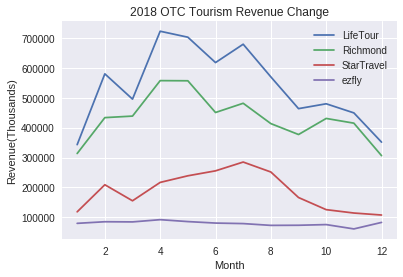

In [108]:
# 2018 OTC Tourism Revenues Change
%matplotlib inline
import matplotlib.pyplot as plt

month = [12,11,10,9,8,7,6,5,4,3,2,1]

#五福
LifeTour = [351600,449373,479817,463601,569747,678981,617620,702445,722388,495416,579930,343154]

#山富
Richmond =  [306408,415018,430791,377055,413532,481554,450686,556761,557248,438669,433539,313570]

#燦星旅
StarTravel = [107842,114542,125794,166387,251706,284985,255601,239028,216938,155486,209103,118546]

#易飛
ezfly = [83147,61410,75873,73636,73252,79215,80954,85930,92315,84852,85393,80037]

plt.plot(month, LifeTour, label= "LifeTour")
plt.plot(month, Richmond, label= "Richmond")
plt.plot(month, StarTravel, label= "StarTravel")
plt.plot(month, ezfly, label= "ezfly")

plt.xlabel('Month')
plt.ylabel('Revenue(Thousands)')
plt.title('2018 OTC Tourism Revenue Change')
plt.legend()

#2017 OTC 旅遊業營收變化

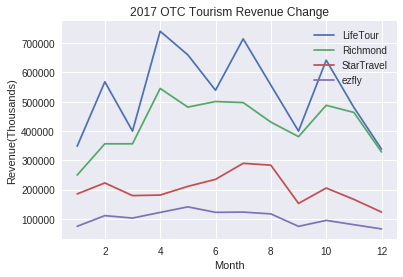

In [109]:
# 2017 OTC Tourism Revenues Change
#五福
LifeTour_2017 = [348118,567988,399768,740618,659950,539223,714533,556772,399717,641843,480639,338385]

#山富
Richmond_2017 =  [249753,356412,356424,545384,481618,500768,497176,430474,380834,487855,463536,328595]

#燦星旅
StarTravel_2017 = [185335,222852,179614,181496,211095,235129,289787,283535,152938,205437,166785,123350]

#易飛
ezfly_2017 = [74853,111266,102929,122288,141180,122544,123353,117215,74618,95057,80382,65940]

plt.plot(month_2017, LifeTour_2017, label= "LifeTour")
plt.plot(month_2017, Richmond_2017, label= "Richmond")
plt.plot(month_2017, StarTravel_2017, label= "StarTravel")
plt.plot(month_2017, ezfly_2017, label= "ezfly")

plt.xlabel('Month')
plt.ylabel('Revenue(Thousands)')
plt.title('2017 OTC Tourism Revenue Change')
plt.legend()

#2017/2018 五福旅行社 LifeTour 營收變化

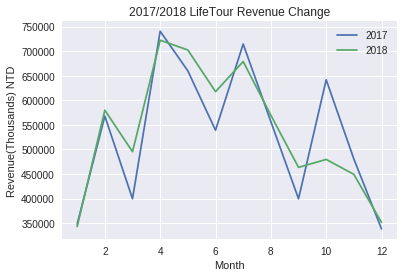

In [110]:
# 2017/2018 Lifetour Revenues Change
# 五福
plt.plot(month_2017, LifeTour_2017, label="2017")
plt.plot(month, LifeTour, label="2018")
plt.xlabel('Month')
plt.ylabel('Revenue(Thousands) NTD')
plt.title('2017/2018 LifeTour Revenue Change')
plt.legend()

#2017/2018 山富旅行社 Richmond 營收變化

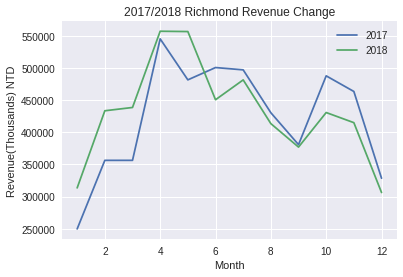

In [111]:
# 2017/2018 Richmond Revenues Change
# 山富
plt.plot(month_2017, Richmond_2017, label="2017")
plt.plot(month, Richmond, label="2018")
plt.xlabel('Month')
plt.ylabel('Revenue(Thousands) NTD')
plt.title('2017/2018 Richmond Revenue Change')
plt.legend()

#2017/2018 StarTravel 燦星網 營收變化

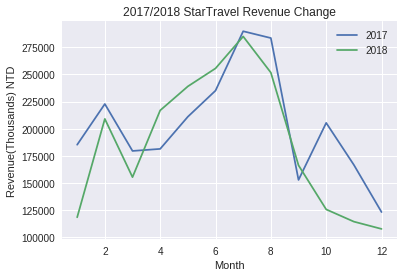

In [112]:
# 2017/2018 StarTravel Revenues Change
# 燦星旅
plt.plot(month_2017, StarTravel_2017, label="2017")
plt.plot(month, StarTravel, label="2018")
plt.xlabel('Month')
plt.ylabel('Revenue(Thousands) NTD')
plt.title('2017/2018 StarTravel Revenue Change')
plt.legend()

#2017/2018 易飛網 ezfly 營收變化

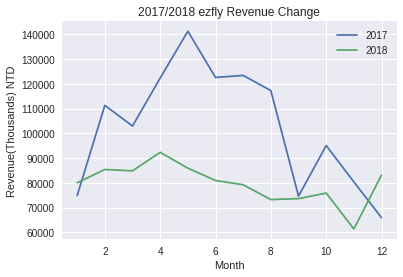

In [113]:
# 2017/2018 ezfly Revenues Change
# 易飛網
plt.plot(month_2017, ezfly_2017, label="2017")
plt.plot(month, ezfly, label="2018")
plt.xlabel('Month')
plt.ylabel('Revenue(Thousands) NTD')
plt.title('2017/2018 ezfly Revenue Change')
plt.legend()